In [24]:
%load_ext autoreload
%autoreload 2
import sys

path = "C:/Users/schiavaz/lava-nc/depth/"
sys.path.append(path)

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import open3d as o3d
from tqdm import tqdm
import scipy.io

import events_utils.filter as flt
import events_utils.visualize as vis
import events_utils.time_difference as td
import events_utils.time_difference_2d as td2d
import events_utils.tum_vie as tum_dset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [557]:
#define time range
t_start = 0.0
duration = 0.6
t_end = t_start + duration
shape = (137, 137)

In [558]:
events_raw = scipy.io.loadmat(path + "/data/stripes.mat")
events_rel = events_raw["events"]
events = np.zeros(events_rel.shape)
events[:,0] = events_rel[:,3] * 10e-6
events[:,1:] = events_rel[:,:3]

events_raw = events

In [559]:
events_t = flt.filter_time(events_raw, t_start, t_end)

In [560]:
patch_center = (60, 60)
patch_size = 120
shape = (patch_size, patch_size)
events_p = flt.filter_patch(events_t, patch_center, patch_size)

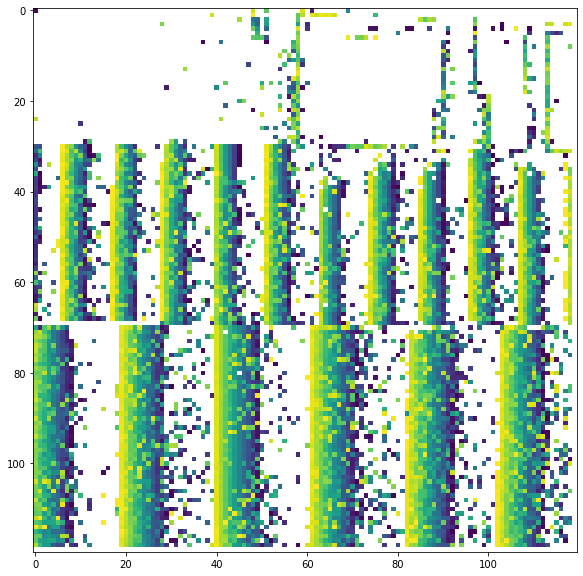

In [561]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events_p, shape, filter_polarity=False, polarity=1)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

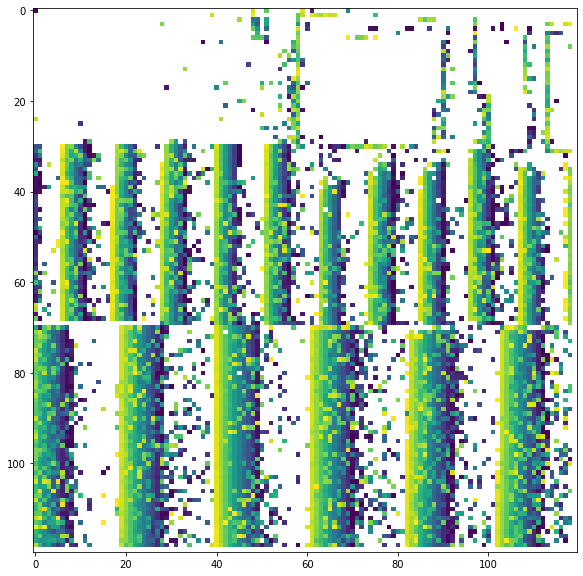

In [562]:
events = flt.filter_refract(events_p, 0.1)
%matplotlib inline
plt.figure(figsize=(10, 10))
img = vis.events2time_surf(events, shape, filter_polarity=False, polarity=0)
img_m = np.ma.masked_where(img == 0, img)
m = plt.imshow(img_m, interpolation="none")
#plt.colorbar(mappable=m)

In [563]:
poses_times = np.linspace(0.0, 1.0, 200)


In [564]:
events[8000, 0]

0.50009

In [565]:
poses = np.loadtxt(path + "data/slider-depth/groundtruth.txt")

In [566]:
time_d = td2d.TimeDifference2d(shape, events, poses)

(2, 338)


In [594]:
final_td, td_predictions, U, V, diff_list = time_d.compute_time_difference(dist = 1, px_range_pred=7, delay=0.4, avg_n=5, std_mul=1.01, debug=True)

100%|████████████████████████████████████████████████████████████████████████████| 9348/9348 [00:01<00:00, 7482.85it/s]


total: 9326
diff: 0
negative: 4875
q: 0
ang: 0
ind: 4188
img: 2646
filtered: 0


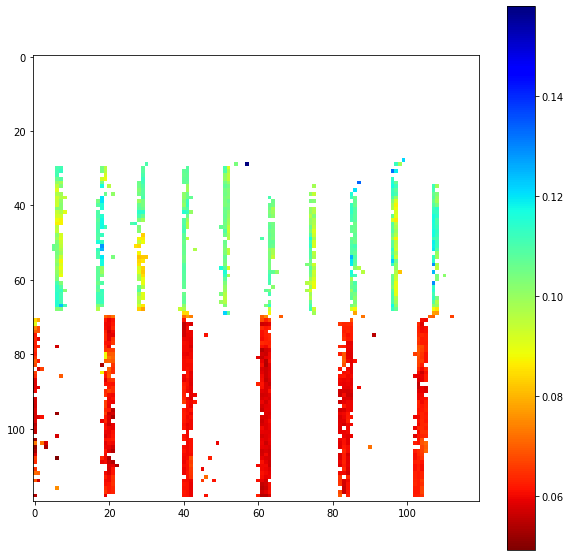

In [595]:
%matplotlib inline
plt.figure(figsize=(10, 10))
final_td_m = np.ma.masked_where(final_td == 0, final_td)
m = plt.imshow(final_td_m, cmap="jet_r", interpolation="none")
plt.colorbar(m)

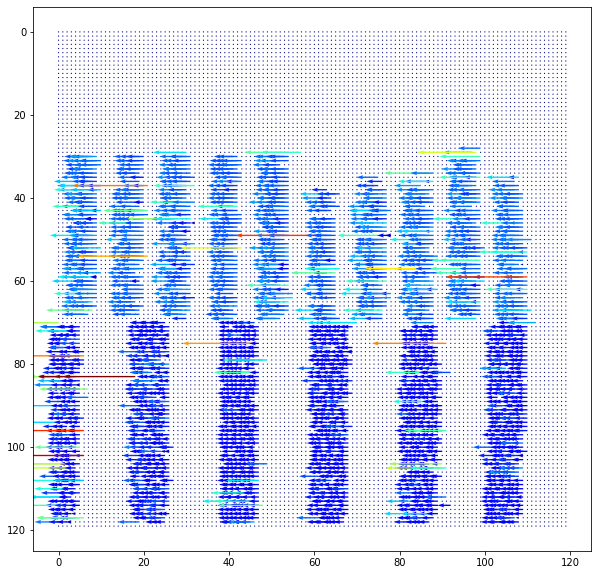

In [596]:
%matplotlib inline
plt.figure(figsize=(10, 10))
plt.quiver(U, V, U, scale =3, cmap="jet_r")
plt.gca().invert_yaxis()

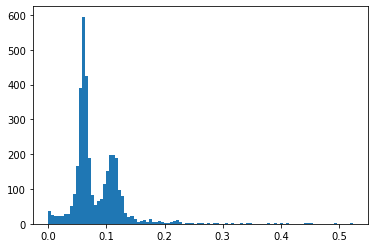

In [597]:
plt.hist(diff_list, 100);

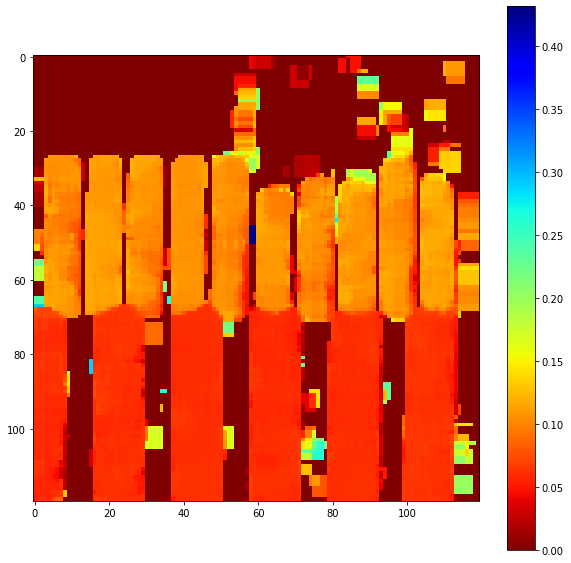

In [598]:
%matplotlib inline
img, count = td.median_from_dict(td_predictions, shape, 2)

plt.figure(figsize=(10, 10))
m = plt.imshow(img, cmap="jet_r")
plt.colorbar(m)

In [599]:
td_predictions[18, 42]

KeyError: (18, 42)

In [600]:
u = np.divide(1.0, final_td_m, where=final_td!=0.0)
d = td.td2depth_slider(u)

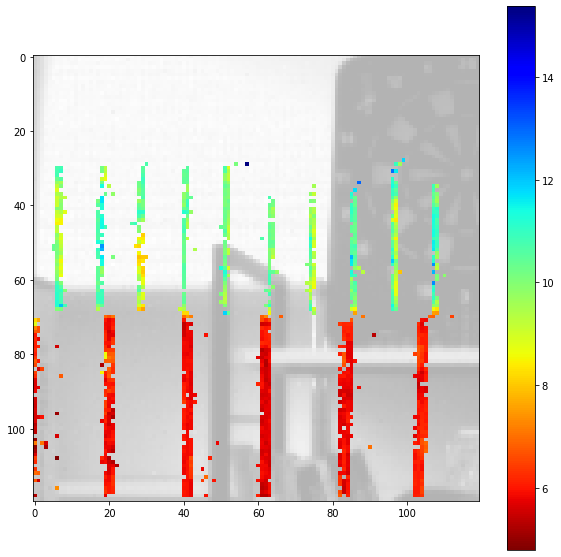

In [602]:
%matplotlib inline
plt.figure(figsize=(10, 10))
img_gray = plt.imread(path + "data/slider-depth/images/frame_00000041.png")
plt.imshow(img_gray, alpha=0.3, cmap="gray")
m = plt.imshow(d, cmap="jet_r", interpolation="none")
plt.colorbar(m)

In [603]:
%matplotlib qt
vis.visualize3d(d)